In [2]:
3 + 5

8

In [22]:
import pandas as pd 
import numpy as np


db = pd.read_excel('BTM1.xlsx')

In [23]:
db.head()

,From Date,To Date,PM2.5,NO
0,01-08-2022 00:00,02-08-2022 00:00,46.25,19.27
1,02-08-2022 00:00,03-08-2022 00:00,42.69,19.34
2,03-08-2022 00:00,04-08-2022 00:00,29.38,19.38
3,04-08-2022 00:00,05-08-2022 00:00,None,None
4,05-08-2022 00:00,06-08-2022 00:00,None,19.38


In [24]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  92 non-null     object
 1   To Date    92 non-null     object
 2   PM2.5      92 non-null     object
 3   NO         92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [25]:
db = db.replace('None', np.nan)
db.head()

,From Date,To Date,PM2.5,NO
0,01-08-2022 00:00,02-08-2022 00:00,46.25,19.27
1,02-08-2022 00:00,03-08-2022 00:00,42.69,19.34
2,03-08-2022 00:00,04-08-2022 00:00,29.38,19.38
3,04-08-2022 00:00,05-08-2022 00:00,NaN,NaN
4,05-08-2022 00:00,06-08-2022 00:00,NaN,19.38


In [26]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  92 non-null     object 
 1   To Date    92 non-null     object 
 2   PM2.5      88 non-null     float64
 3   NO         88 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


In [27]:
db_pm2_5 = db[['From Date', 'PM2.5']]

In [28]:
db_pm2_5.head()

,From Date,PM2.5
0,01-08-2022 00:00,46.25
1,02-08-2022 00:00,42.69
2,03-08-2022 00:00,29.38
3,04-08-2022 00:00,NaN
4,05-08-2022 00:00,NaN


In [29]:
date_time = pd.to_datetime(db_pm2_5.pop('From Date'), format='%d-%m-%Y %H:%M')

In [30]:
db_pm2_5.head()

,PM2.5
0,46.25
1,42.69
2,29.38
3,NaN
4,NaN


In [31]:
print(date_time)

0    2022-08-01
1    2022-08-02
2    2022-08-03
3    2022-08-04
4    2022-08-05
        ...    
87   2022-10-27
88   2022-10-28
89   2022-10-29
90   2022-10-30
91   2022-10-31
Name: From Date, Length: 92, dtype: datetime64[ns]


In [32]:
db_pm2_5.insert(0, 'Date_time', date_time)

In [33]:
db_pm2_5.set_index('Date_time', inplace=True)

In [34]:
db_pm2_5.tail()
#db_pm2_5.isna().sum()

,PM2.5
Date_time,
2022-10-27,39.41
2022-10-28,50.62
2022-10-29,28.35
2022-10-30,28.35
2022-10-31,NaN


In [35]:
db_pm2_5['PM2.5'].fillna(db_pm2_5['PM2.5'].median(), inplace = True)

C:\Users\liching\AppData\Local\Temp\ipykernel_35920\1439158334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_pm2_5['PM2.5'].fillna(db_pm2_5['PM2.5'].median(), inplace = True)


In [36]:
db_pm2_5.isna().sum()
db_pm2_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-08-01 to 2022-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   92 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [37]:
db_pm2_5.head()

,PM2.5
Date_time,
2022-08-01,46.250
2022-08-02,42.690
2022-08-03,29.380
2022-08-04,21.615
2022-08-05,21.615


In [38]:
db_pm2_5['PM2.5']

Date_time
2022-08-01    46.250
2022-08-02    42.690
2022-08-03    29.380
2022-08-04    21.615
2022-08-05    21.615
               ...  
2022-10-27    39.410
2022-10-28    50.620
2022-10-29    28.350
2022-10-30    28.350
2022-10-31    21.615
Name: PM2.5, Length: 92, dtype: float64

In [42]:
# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(db_pm2_5)

# scaled = scaler.transform(db_pm2_5)
# scaled_df = pd.DataFrame(scaled, columns=db_pm2_5.columns)
# print(scaled_df)



# normalise the Pm2.5 values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
db_pm2_5['PM2.5'] = scaler.fit_transform(db_pm2_5['PM2.5'].values.reshape(-1,1))



C:\Users\liching\AppData\Local\Temp\ipykernel_35920\3136818607.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_pm2_5['PM2.5'] = scaler.fit_transform(db_pm2_5['PM2.5'].values.reshape(-1,1))


In [43]:
db_pm2_5.head()

,PM2.5
Date_time,
2022-08-01,0.554859
2022-08-02,0.491140
2022-08-03,0.252909
2022-08-04,0.113925
2022-08-05,0.113925


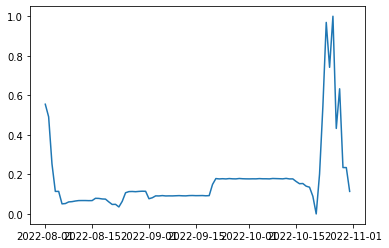

In [44]:
from matplotlib import pyplot as plt

plt.plot(db_pm2_5['PM2.5'])
#plt.plot(db_pm2_5['Date_time'], db_pm2_5['PM2.5'])

In [45]:
from statsmodels.tsa.stattools import adfuller


In [46]:
db_stationarityTest = adfuller(db_pm2_5['PM2.5'], autolag='AIC')
print('ADF Statistic: %f' % db_stationarityTest[0])
print("P-value: ", db_stationarityTest[1])

ADF Statistic: -1.149121
P-value:  0.6950912457023903


In [47]:
db_stationarityTest

(-1.1491205952934822,
 0.6950912457023903,
 8,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 -169.58449229827295)

c:\Users\liching\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


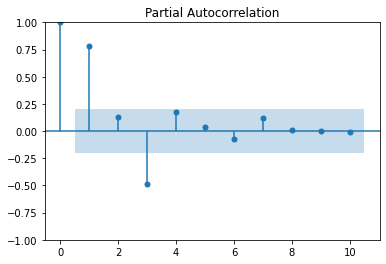

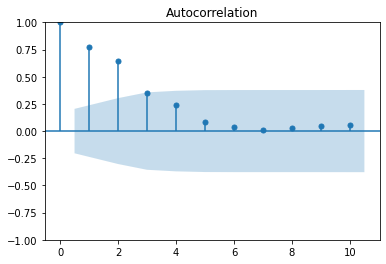

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
pacf = plot_pacf(db_pm2_5['PM2.5'], lags= 10)
acf = plot_acf(db_pm2_5['PM2.5'], lags= 10)


In [49]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function
stepwise_fit = auto_arima(db_pm2_5['PM2.5'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-123.102, Time=0.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-111.838, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-111.981, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-110.028, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-125.076, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-123.103, Time=0.57 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-121.088, Time=1.60 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-112.026, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-113.979, Time=0.08 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=-133.755, Time=0.29 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-131.778, Time=0.64 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-131.777, Time=1.53 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=-129.775, Time=1.98 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-132.512, Time=0.12 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   92
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood                  77.920
Date:                             Fri, 18 Nov 2022   AIC                           -143.840
Time:                                     18:55:52   BIC                           -129.624
Sample:                                 08-01-2022   HQIC                          -138.145
                                      - 10-31-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.002      0.866      0.387      -0.002       0.006
ar.L1          0.7389      0.069     10.758      0.000       0.604       0.873
ar.L2          0.5096      0.071      7.229      0.000       0.371       0.648
ar.L3         -0.6326      0.061    -10.374      0.000      -0.752      -0.513
ma.L1         -0.9156      0.091    -10.043      0.000      -1.094      -0.737
sigma2         0.0079      0.001      7.648      0.000       0.006       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               108.12
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               5.21   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Split data into train / test sets
train = db_pm2_5.iloc[:len (db_pm2_5)-24]
test = db_pm2_5.iloc[len (db_pm2_5)-24:] # for last 24 lag


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['PM2.5'],
				order = (3, 1, 1),
				seasonal_order =(0, 1, 0, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               PM2.5   No. Observations:                   68
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood                 106.861
Date:                             Fri, 18 Nov 2022   AIC                           -203.721
Time:                                     18:56:19   BIC                           -193.685
Sample:                                 08-01-2022   HQIC                          -199.840
                                      - 10-07-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1785      0.272      0.656      0.512      -0.355       0.712
ar.L2          0.0241      0.166      0.145      0.885      -0.302       0.350
ar.L3          0.3481      0.294      1.182      0.237      -0.229       0.925
ma.L1          0.5066      0.314      1.614      0.107      -0.109       1.122
sigma2         0.0012      0.000      5.873      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               418.65
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             2.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'SARIMAX Model'}, xlabel='Date_time'>

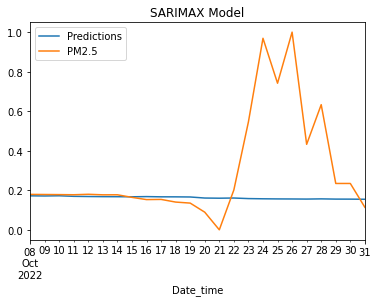

In [51]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions_sarimax = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
plt.title('SARIMAX Model')
predictions_sarimax.plot(legend = True)
test['PM2.5'].plot(legend = True)


<AxesSubplot:xlabel='Date_time'>

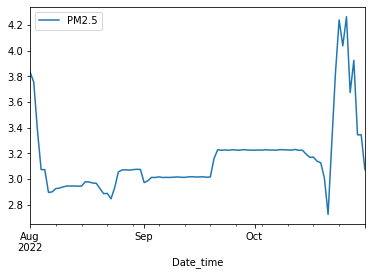

In [33]:
# # taking log of the data to stabalise.

# import numpy as np
# df = np.log(db_pm2_5) 

# df.plot()

<AxesSubplot:xlabel='Date_time'>

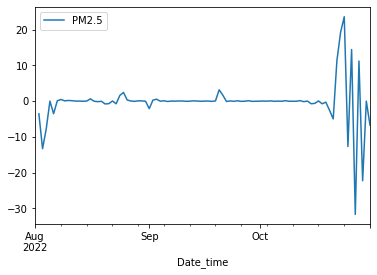

In [34]:
# df = db_pm2_5.diff()
# df.plot()

In [52]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['PM2.5'], order=(3,1,1))
model_fit1 = model.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                   68
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 145.034
Date:                Fri, 18 Nov 2022   AIC                           -280.068
Time:                        18:56:38   BIC                           -269.045
Sample:                    08-01-2022   HQIC                          -275.706
                         - 10-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0391      0.160     -0.244      0.807      -0.353       0.275
ar.L2          0.2273      0.089      2.541      0.011       0.052       0.403
ar.L3          0.5815      0.055     10.504      0.0

<AxesSubplot:title={'center':'ARIMA'}, xlabel='Date_time'>

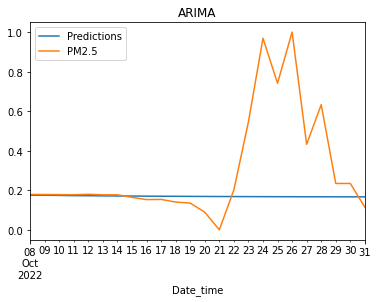

In [53]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions_arima = model_fit1.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
plt.title('ARIMA')
predictions_arima.plot(legend = True)
test['PM2.5'].plot(legend = True)

*check if the model is doing good with residual and density*

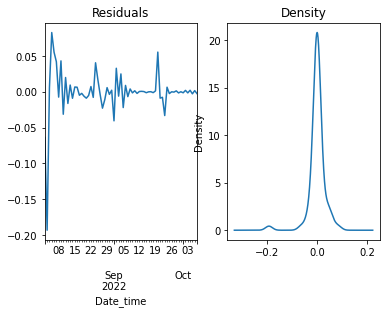

In [54]:
import matplotlib.pyplot as plt
residuals = model_fit1.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

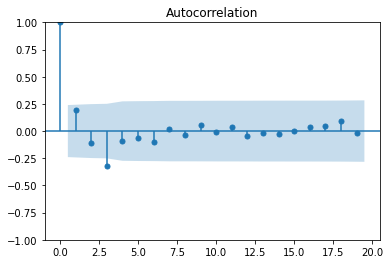

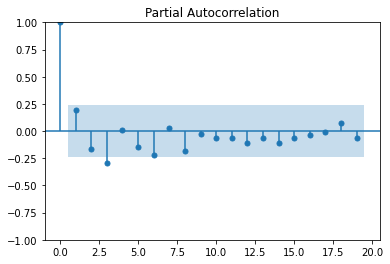

In [55]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<AxesSubplot:xlabel='Date_time'>

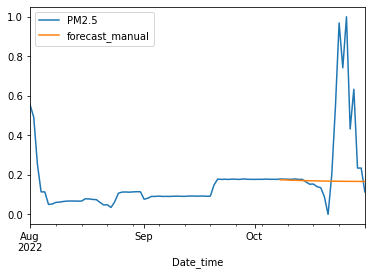

In [56]:
forecast_test = model_fit1.forecast(len(test))

db_pm2_5['forecast_manual'] = [None]*len(train) + list(forecast_test)

db_pm2_5.plot()

In [57]:
# mean absolute error
#arima model

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test, predictions_arima)
print(f'The MAE of the ARIMA model is {MAE}')
rmse = np.sqrt(MAE)
print(f'The RMSE of the ARIMA model is {rmse}')

#sari max model

MAE_sarimax = mean_absolute_error(test, predictions_sarimax)
print(f'The MAE of the SARIMAX model is {MAE_sarimax}')
rmse_sarimax = np.sqrt(MAE_sarimax)
print(f'The RMSE of the SARIMAX model is {rmse_sarimax}')


The MAE of the ARIMA model is 0.16354897240549485
The RMSE of the ARIMA model is 0.40441188459971705
The MAE of the SARIMAX model is 0.16674377018664233
The RMSE of the SARIMAX model is 0.4083427116854693


In [58]:
# R2 score of the model

from sklearn.metrics import r2_score

r2_arima = r2_score(test, predictions_arima)
print(f'The R2 score of the ARIMA model is {r2_arima}')
r2_sarimax = r2_score(test, predictions_sarimax)
print(f'The R2 score of the SARIMAX model is {r2_sarimax}')


The R2 score of the ARIMA model is -0.24257516237816268
The R2 score of the SARIMAX model is -0.284364985586399


In [59]:
df_model = pd.DataFrame({'Model': ['ARIMA', 'SARIMAX'], 'MAE': [MAE, MAE_sarimax], 'RMSE': [rmse, rmse_sarimax], 'R2': [r2_arima, r2_sarimax]})
df_model.head()

,Model,MAE,RMSE,R2
0,ARIMA,0.163549,0.404412,-0.242575
1,SARIMAX,0.166744,0.408343,-0.284365


<AxesSubplot:xlabel='Model'>

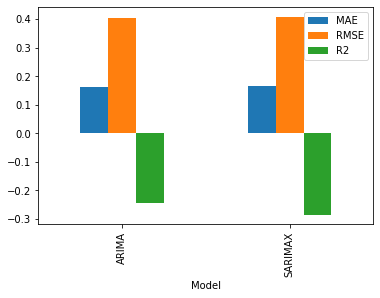

In [60]:

df_model.plot(x='Model', y=['MAE', 'RMSE', 'R2'], kind='bar')

In [61]:
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

<AxesSubplot:xlabel='Date_time'>

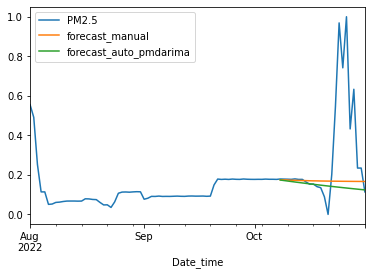

In [62]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))

db_pm2_5['forecast_auto_pmdarima'] = [None]*len(train) + list(forecast_test_auto)

db_pm2_5.plot()

In [63]:
db_pm2_5

,PM2.5,forecast_manual,forecast_auto_pmdarima
Date_time,,,
2022-08-01,0.554859,NaN,NaN
2022-08-02,0.491140,NaN,NaN
2022-08-03,0.252909,NaN,NaN
2022-08-04,0.113925,NaN,NaN
2022-08-05,0.113925,NaN,NaN
...,...,...,...
2022-10-27,0.432432,0.167203,0.131542
2022-10-28,0.633077,0.167037,0.129623
2022-10-29,0.234473,0.166908,0.127732


In [64]:

i = ['PM2.5']
new_db = db_pm2_5[i]
new_db.info()





<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-08-01 to 2022-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   92 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [65]:
month_names = []
for i in new_db.index.month_name():
    if i not in month_names:
        month_names.append(i)
month_index = sorted(list(set(new_db.index.month)))
months = zip(month_index, month_names)

In [66]:
new_db_1 = pd.DataFrame()

In [67]:
for month in months:
    new_db_1[month[1]] = new_db[new_db.index.month == month[0]].reset_index()['PM2.5']
    


In [68]:
new_db_1.head()

,August,September,October
0,0.554859,0.076785,0.177197
1,0.491140,0.081797,0.177555
2,0.252909,0.091283,0.177376
3,0.113925,0.090925,0.178629
4,0.113925,0.092715,0.177734


<AxesSubplot:>

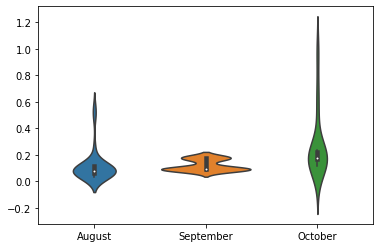

In [69]:
# plot a violon plot of the data

import seaborn as sns
sns.violinplot(data=new_db_1)